In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [3]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [5]:
#split validation from train
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state=42)

In [6]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2
epochs=25

In [8]:
#model is RNN with 256 units
model = Sequential()
model.add(SimpleRNN(units=units,dropout=dropout,input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 256)               72960     
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
 activation_1 (Activation)   (None, 10)               

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# train the network
history=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(x_val,y_val))



Epoch 1/25
375/375 [==============================] - 9s 20ms/step - loss: 1.7857 - accuracy: 0.4078 - val_loss: 0.9140 - val_accuracy: 0.6950
Epoch 2/25
375/375 [==============================] - 7s 20ms/step - loss: 0.6520 - accuracy: 0.7951 - val_loss: 0.4729 - val_accuracy: 0.8616
Epoch 3/25
375/375 [==============================] - 7s 19ms/step - loss: 0.3775 - accuracy: 0.8861 - val_loss: 0.2955 - val_accuracy: 0.9130
Epoch 4/25
375/375 [==============================] - 7s 19ms/step - loss: 0.2763 - accuracy: 0.9168 - val_loss: 0.1999 - val_accuracy: 0.9451
Epoch 5/25
375/375 [==============================] - 7s 19ms/step - loss: 0.2319 - accuracy: 0.9307 - val_loss: 0.3924 - val_accuracy: 0.8828
Epoch 6/25
375/375 [==============================] - 7s 19ms/step - loss: 0.1965 - accuracy: 0.9407 - val_loss: 0.1628 - val_accuracy: 0.9533
Epoch 7/25
375/375 [==============================] - 7s 18ms/step - loss: 0.1705 - accuracy: 0.9483 - val_loss: 0.1346 - val_accuracy: 0.9597

1500/1500 [==============================] - 7s 4ms/step - loss: 0.0429 - accuracy: 0.9864
0.9864374995231628
0.04292650520801544
313/313 [==============================] - 1s 4ms/step - loss: 0.0643 - accuracy: 0.9811
0.9811000227928162
0.06434904038906097


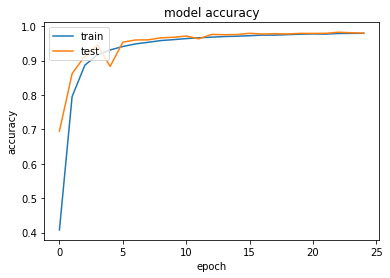

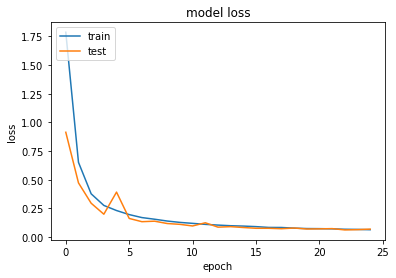

In [10]:
train_loss , train_accuracy=model.evaluate(x_train,y_train)
print(train_accuracy)
print(train_loss)
loss , accuracy=model.evaluate(x_test,y_test)
print(accuracy)
print(loss)
y_pred = model.predict(x_test)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test, steps=len(x_test), verbose=0)

y_pred = np.argmax(predictions, axis=-1)

y_true=np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_true, y_pred)

print(cm)

[[ 969    0    2    0    1    0    4    2    2    0]
 [   0 1129    2    0    0    0    1    1    2    0]
 [   4    5 1013    1    1    0    1    6    1    0]
 [   0    0    7  988    0    7    0    4    3    1]
 [   1    1    0    0  967    0    4    1    2    6]
 [   3    0    0    2    3  864    8    1    4    7]
 [   2    3    0    0    6    1  945    0    1    0]
 [   0    4    8    1    1    0    1 1002    1   10]
 [   5    0    2    2    9    2    2    1  946    5]
 [   2    2    0    2    8    1    0    6    0  988]]


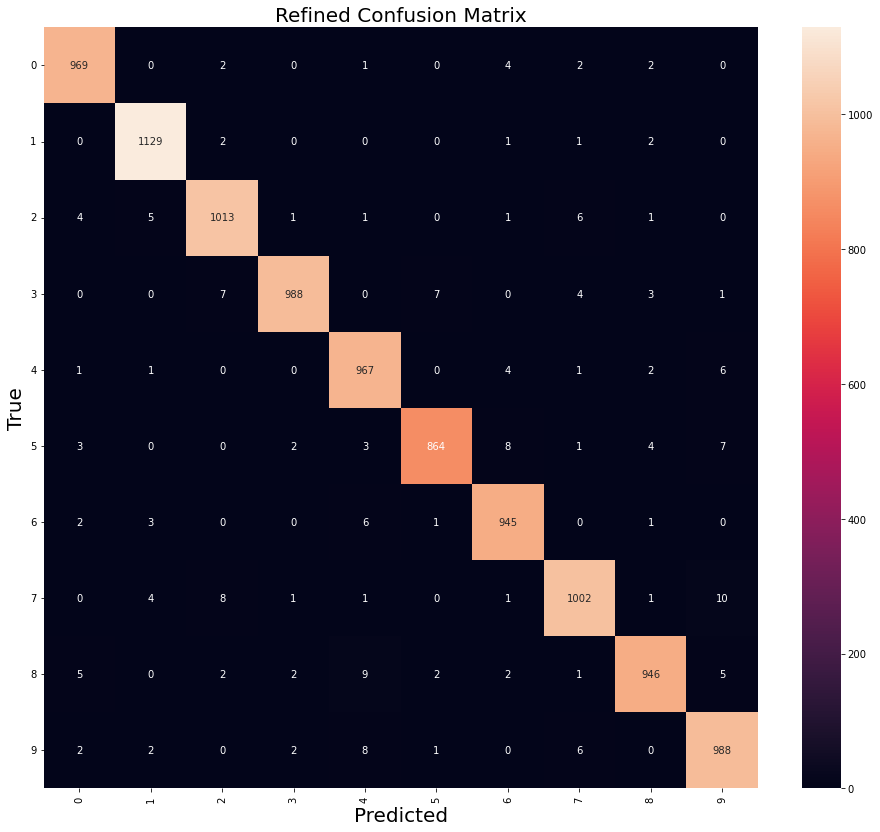

In [12]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)

ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)

plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()